<a href="https://colab.research.google.com/github/Mukul-MV/pyTHON-PROjects/blob/main/Dog_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ./.kaggle

In [3]:
!cp ./kaggle.json ./.kaggle/

cp: cannot stat './kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:56<00:00, 21.2MB/s]
100% 1.06G/1.06G [00:56<00:00, 20.3MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('./dogs-vs-cats.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()

In [6]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [7]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))  # creating object of VGG16

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**here** include top fasle means we are removing dense layer (green part) so that we can train our model on that.
we are importing only upto last pooling part

In [8]:
from IPython.display import Image
Image('/content/webimage/download.png',width=700, height=200)

FileNotFoundError: No such file or directory: '/content/webimage/download.png'

FileNotFoundError: No such file or directory: '/content/webimage/download.png'

<IPython.core.display.Image object>

In [9]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# we are making our own sequantial model from scratch
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
conv_base.trainable = False #we are freezing upto las pooling

In [12]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
#Normalize

def process(image,label):
  image = tensorflow.cast(image/255. ,tensorflow.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,validation_data=validation_ds,epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 84ms/step - accuracy: 0.8615 - loss: 0.3247 - val_accuracy: 0.8874 - val_loss: 0.2519
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9158 - loss: 0.2018 - val_accuracy: 0.9080 - val_loss: 0.2138
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - accuracy: 0.9328 - loss: 0.1628 - val_accuracy: 0.9100 - val_loss: 0.2135
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9504 - loss: 0.1290 - val_accuracy: 0.9104 - val_loss: 0.2272
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.9601 - loss: 0.1026 - val_accuracy: 0.9156 - val_loss: 0.2235
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.9689 - loss: 0.0814 - val_accuracy: 0.9146 - val_loss: 0.2570
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.9824 - loss: 0.0519 - val_accuracy: 0.9090 - val_loss: 0.3147
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9816 - loss: 0.0488 - 

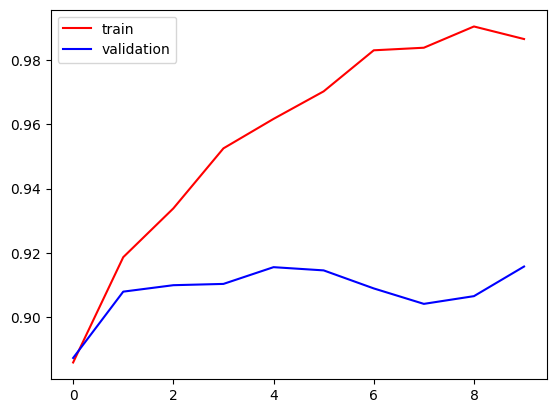

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

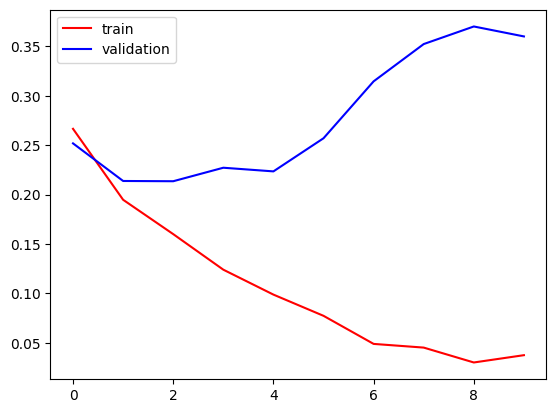

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [19]:
#then we do data augmentation to reduce overfitttings
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(train_generator,epochs=10,validation_data=validation_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 247ms/step - accuracy: 0.9155 - loss: 0.2264 - val_accuracy: 0.9096 - val_loss: 0.2186
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 245ms/step - accuracy: 0.9271 - loss: 0.1712 - val_accuracy: 0.9178 - val_loss: 0.2062
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 247ms/step - accuracy: 0.9304 - loss: 0.1685 - val_accuracy: 0.9208 - val_loss: 0.1955
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 243ms/step - accuracy: 0.9352 - loss: 0.1544 - val_accuracy: 0.9148 - val_loss: 0.2100
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 243ms/step - accuracy: 0.9395 - loss: 0.1470 - val_accuracy: 0.9112 - val_loss: 0.2289
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 242ms/step - accuracy: 0.9462 - loss: 0.1341 - val_accuracy: 0.9154 - val_loss: 0.2284
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 205s 245ms/step - accuracy: 0.9489 - loss: 0.1272 - val_accuracy: 0.9230 - val_loss: 0.2045
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 248ms/step - accuracy: 0.9534 - loss: 0.11

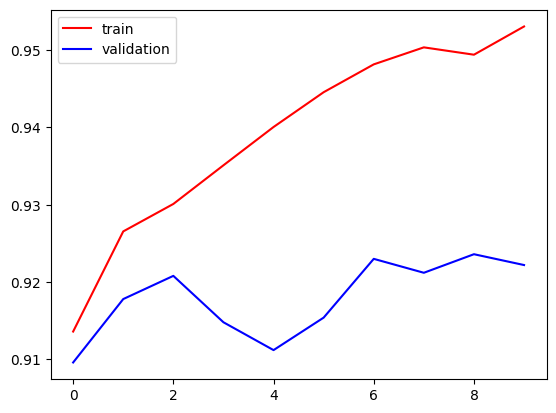

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

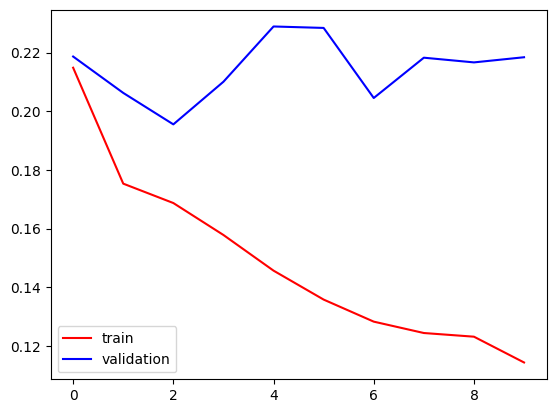

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()